In [1]:
from glob import glob
from PIL import Image
import numpy as np
import torch

In [7]:
def channelize(mask_array, n_classes=10):
    mask_10d = torch.zeros(n_classes, mask_array.shape[0], mask_array.shape[1], dtype=torch.float32)
    for i in range(n_classes): 
        mask_10d[i, :, :] = torch.tensor(mask == i, dtype=torch.float32)
    return mask_10d

def get_center_array(mask_10d, coord_filter, relative=False):
    for mask_i in mask_10d[1:]:
        if int(mask_i.sum()) == 0:
            coords.append([0, 0])
            continue
        center_yx = [int((mask_i * coord_filter[:, :, 0]).sum() / mask_i.sum()), int((mask_i * coord_filter[:, :, 1]).sum() / mask_i.sum())]
        if relative:
            center_yx[0] /= mask_i.shape[0]
            center_yx[1] /= mask_i.shape[1]
        coords.append(center_yx)
    assert len(coords) == n_classes - 1, 'dim incorrect'
    return torch.Tensor(coords)

In [8]:
## 重心を求めるためのフィルタ

len_ = 1436
coord_filter = np.array([[(i, j) for j in range(len_)] for i in range(len_)])

In [9]:
img_paths = sorted(glob('../../../create_synthe_2023/synthetic_flw/flw/*/*'))
img_paths[0]

'../../../create_synthe_2023/synthetic_flw/flw/白紫/000000.png'

In [11]:
n_classes = 10

for img_path in img_paths:
    coords = []
    mask = np.array(Image.open(img_path.replace('/flw/', '/mask/')).convert("L"))

    mask_10d = channelize(mask)
    coords = get_center_array(mask_10d, coord_filter)
    break
coords.shape

torch.Size([9, 2])

In [18]:
mask_10d[1:].shape

torch.Size([9, 1436, 1436])

In [19]:
coord_filter.shape

(1436, 1436, 2)

***

## おまけ(可視化)

torch.Size([1436, 1436])

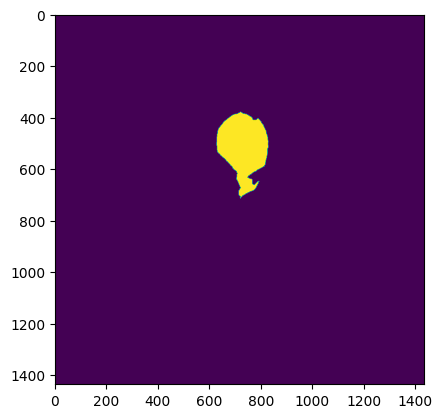

In [34]:
import matplotlib.pyplot as plt
plt.imshow(mask_10d[1])
mask_10d[1].shape